In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
url = "https://drive.google.com/uc?id=1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4&export=download"
df = pd.read_csv(url)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# check for missing values
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


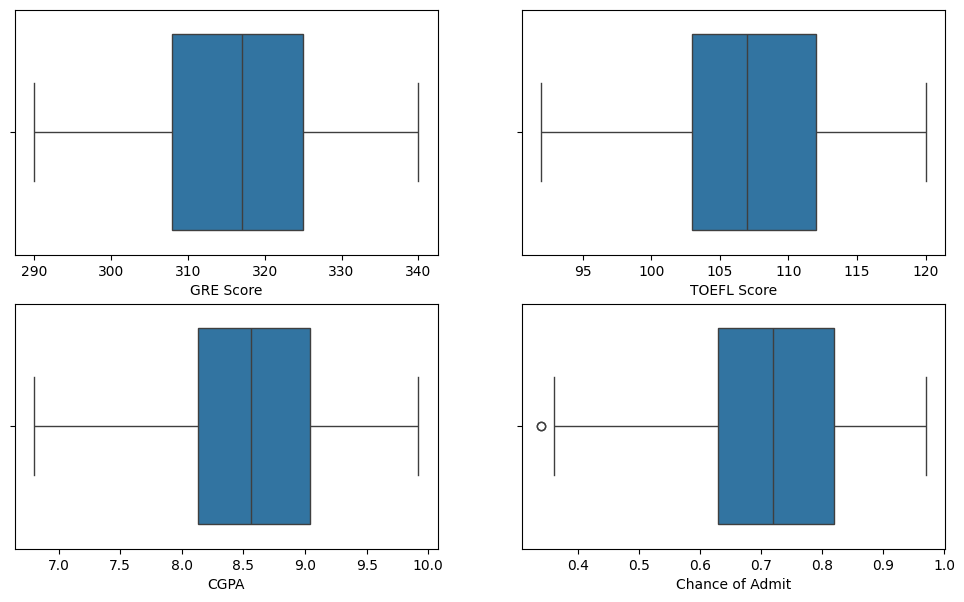

In [ ]:
df.columns = df.columns.str.strip()

cat_cols = ['University Rating', 'SOP', 'LOR', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit'

# Outlier Detection
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 7))

index = 0
for col in range(cols):
    sns.boxplot(x=num_cols[index], data=df, ax=axs[0, index])
    index += 1

sns.boxplot(x=num_cols[-1], data=df, ax=axs[1, 0])
sns.boxplot(x=target, data=df, ax=axs[1, 1])
plt.show()

There are no outlier present in the dataset

# Univariate Analysis

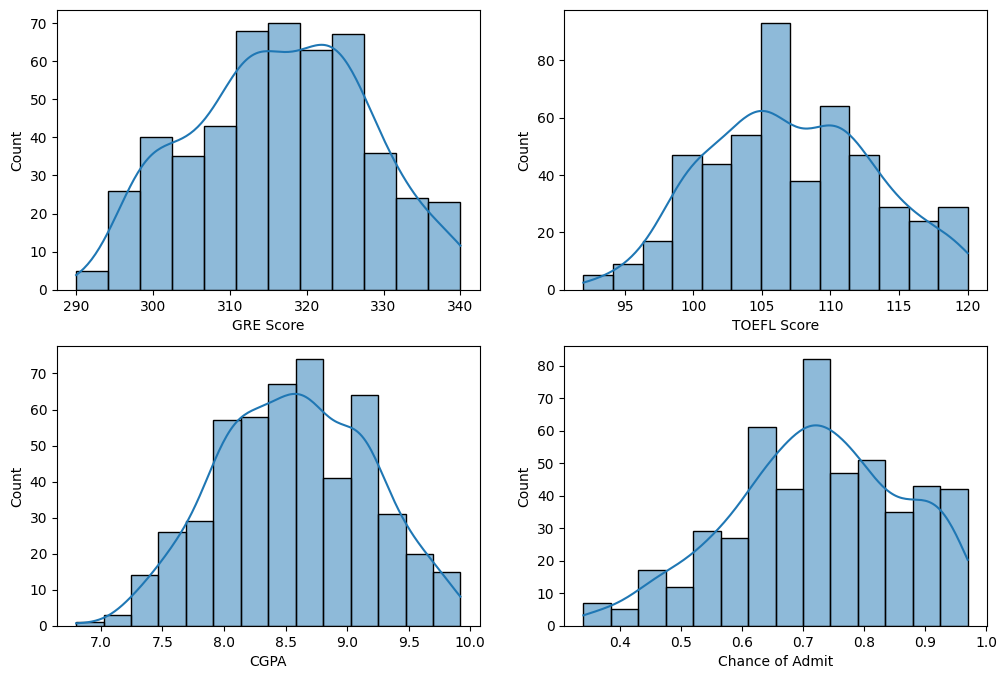

In [ ]:
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
index = 0

for row in range(rows):
    for col in range(cols):
        if index < len(num_cols):
            sns.histplot(df[num_cols[index]], kde=True, ax=axs[row, col])
            index += 1
        else:
            break

sns.histplot(df[target], kde=True, ax=axs[1, 1])
plt.show()

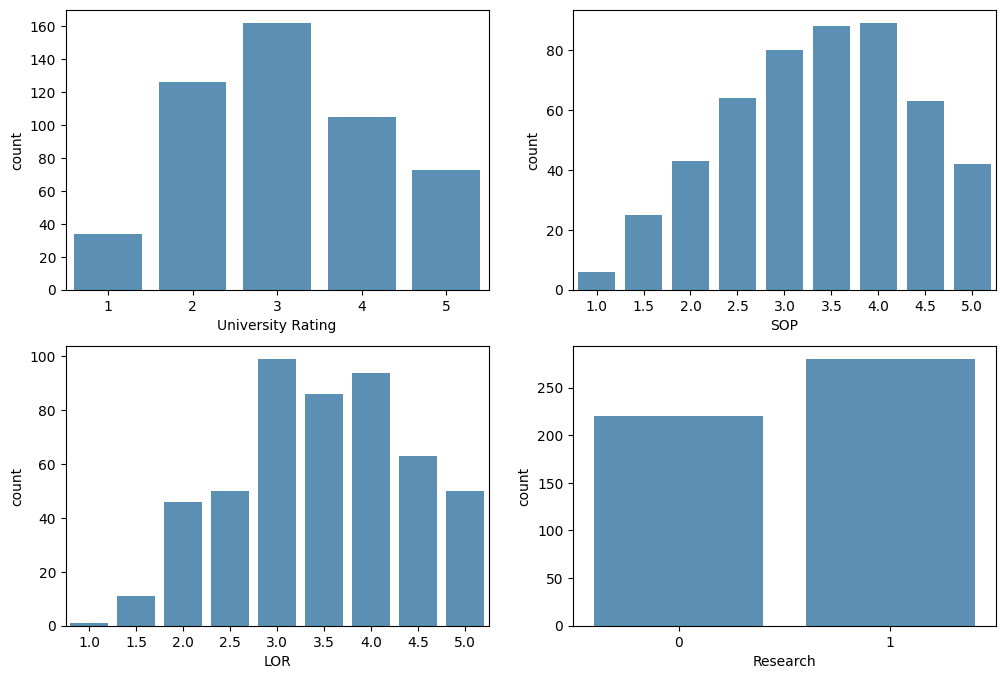

In [ ]:
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.countplot(x=cat_cols[index], data=df, ax=axs[row, col], alpha=0.8)
        index += 1

plt.show()

#Bivariate Analysis

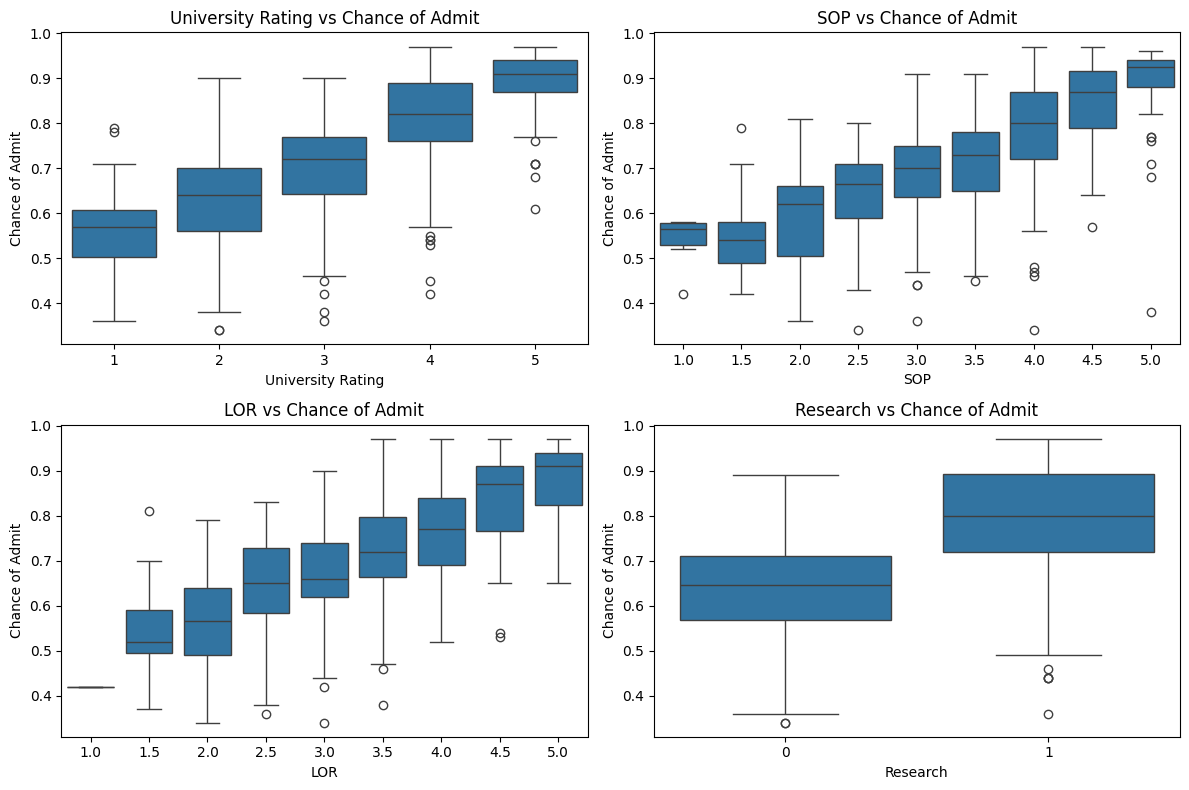

In [ ]:
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))

for idx, cat_col in enumerate(cat_cols):
    row, col = divmod(idx, 2)
    sns.boxplot(x=cat_col, y=target, data=df, ax=axs[row, col])
    axs[row, col].set_title(f"{cat_col} vs {target}")

plt.tight_layout()
plt.show()

####Inference from the above graphs
- Higher rating have improved admission chances but outliers suggests that there are other factors which influence chance of admission.
- Research plays an important role in influenecing chances of admission. Students with research experience have higher chances of admission as compared to students with no research experience.

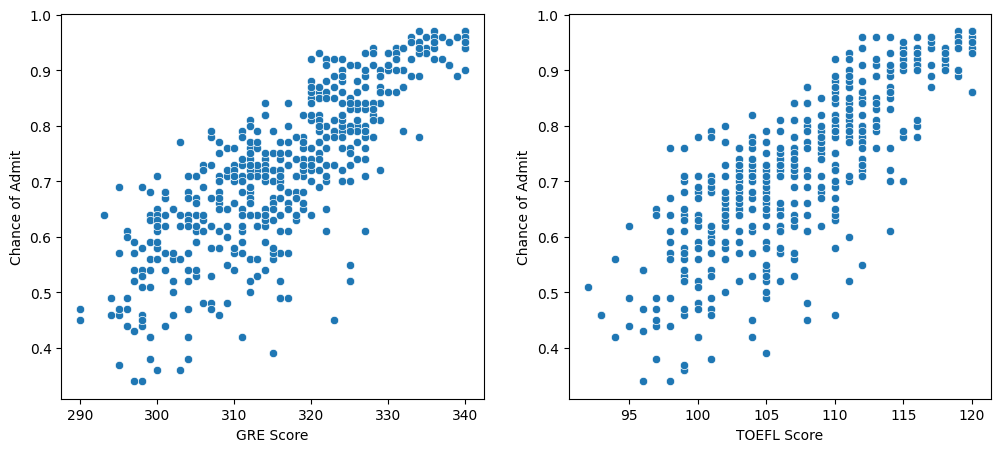

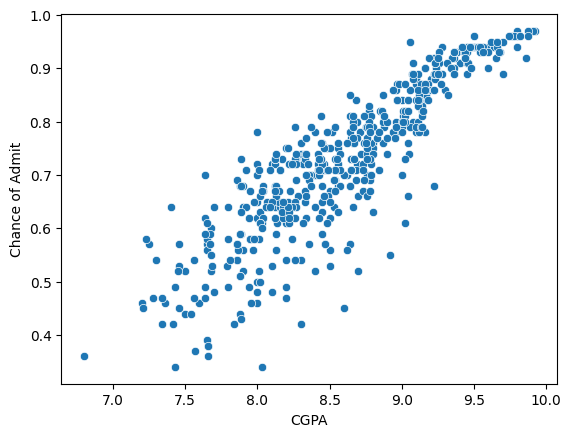

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x=num_cols[0], y=target, data=df, ax=axs[0])
sns.scatterplot(x=num_cols[1], y=target, data=df, ax=axs[1])
plt.show()
sns.scatterplot(x=num_cols[2], y=target, data=df)
plt.show()

- There is a linear relationship between numerical variable and categorical variable

#Data preprocessing

Dropping the unique row identifier

In [ ]:
df = df.drop('Serial No.', axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


This step is important as we don’t want your model to build some understanding based on row numbers.

In [ ]:
#check for duplicates
df.duplicated().sum()

0

No duplicates in the dataset

In [ ]:
X = df.drop(columns=[target])
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [ ]:
# standardize the dataset
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 7) (350,)
(150, 7) (150,)


In [ ]:
def adjusted_r2(r2, p, n):
    """
    n: no of samples
    p: no of predictors
    r2: r2 score
    """
    adj_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))
    return adj_r2

In [ ]:
def get_metrics(y_true, y_pred, p=None):
    n = y_true.shape[0]
    mse = np.sum((y_true - y_pred)**2) / n
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    score = r2_score(y_true, y_pred)
    adj_r2 = None
    if p is not None:
        adj_r2 = adjusted_r2(score, p, n)

    res = {
        "mean_absolute_error": round(mae, 2),
        "rmse": round(rmse, 2),
        "r2_score": round(score, 2),
        "adj_r2": round(adj_r2, 2)
    }
    return res

In [ ]:
def train_model(X_train, y_train, X_test, y_test, cols):
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  p = X_train.shape[1]
  train_res = get_metrics(y_train, y_pred_train, p)
  test_res = get_metrics(y_test, y_pred_test, p)
  print(f"Train MAE: {train_res['mean_absolute_error']} Test MAE: {test_res['mean_absolute_error']}")
  print(f"Train RMSE: {train_res['rmse']} Test RMSE: {test_res['rmse']}")
  print(f"Train R2_score: {train_res['r2_score']} Test R2_score: {test_res['r2_score']}")
  print(f"Train Adjusted_R2: {train_res['adj_r2']} Test Adjusted_R2: {test_res['adj_r2']}")
  print(f"Intercept: {model.intercept_}")
  coef_df = pd.DataFrame({"Column": cols, "Coef": model.coef_})
  print(coef_df)
  print("-"*50)
  return model

In [ ]:
model = train_model(X_train, y_train, X_test, y_test, df.columns[:-1])

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81
Intercept: 0.724978121476996
              Column      Coef
0          GRE Score  0.018657
1        TOEFL Score  0.023176
2  University Rating  0.011565
3                SOP -0.000999
4                LOR  0.012497
5               CGPA  0.064671
6           Research  0.013968
--------------------------------------------------


In [ ]:
def vif(newdf):
    vif_data = pd.DataFrame()
    vif_data["feature"] = newdf.columns
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(newdf.values, i)
                              for i in range(len(newdf.columns))]
    return vif_data

In [ ]:
res = vif(df.iloc[:,:-1])
res

,feature,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


In [ ]:
# drop GRE Score and again calculate the VIF
res = vif(df.iloc[:, 1:-1])
res

,feature,VIF
0,TOEFL Score,639.741892
1,University Rating,19.884298
2,SOP,33.733613
3,LOR,30.631503
4,CGPA,728.778312
5,Research,2.863301


In [ ]:
# drop TOEFL Score and again calculate the VIF
res = vif(df.iloc[:,2:-1])
res

,feature,VIF
0,University Rating,19.777410
1,SOP,33.625178
2,LOR,30.356252
3,CGPA,25.101796
4,Research,2.842227


In [ ]:
# Now lets drop the SOP and again calculate VIF
res = vif(df.iloc[:,2:-1].drop(columns=['SOP']))
res

,feature,VIF
0,University Rating,15.140770
1,LOR,26.918495
2,CGPA,22.369655
3,Research,2.819171


In [ ]:
newdf = df.iloc[:,2:-1].drop(columns=['SOP'])
newdf = newdf.drop(columns=['LOR'], axis=1)
res = vif(newdf)
res

,feature,VIF
0,University Rating,12.498400
1,CGPA,11.040746
2,Research,2.783179


In [ ]:
# drop the University Rating
newdf = newdf.drop(columns=['University Rating'])
res = vif(newdf)
res

,feature,VIF
0,CGPA,2.455008
1,Research,2.455008


In [ ]:
# now again train the model with these only two features
X = df[['CGPA', 'Research']]
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
model = train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'])

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.07
Train R2_score: 0.78 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7247774222727991
     Column      Coef
0      CGPA  0.112050
1  Research  0.020205
--------------------------------------------------


After removing collinear features using VIF and using only two features. R2_score and Adjusted_r2 are still the same as before the testing dataset.

Mean of Residuals- It is clear from RMSE that Mean of Residuals is almost zero.

##Insights
- Multicollinearity was detected, and only CGPA and Research were identified as key predictors for Chance of Admit.
- CGPA is the most influential variable in determining admission likelihood.
- Indepedent variables are linearly correlated with dependent variables.

##Model Performance
- RMSE: 0.07
- MAE: 0.05
- R Square: 0.81
- Adjusted R Square: 0.81

The model shows strong accuracy and reliability.

## Questionnaire

#### People with higher GRE Scores also have higher TOEFL Scores. (T/F)

In [ ]:
#correlation between GRE Score and TOEFL Score
correlation = df['GRE Score'].corr(df['TOEFL Score'])
print(f"Correlation score: {correlation}")
if correlation > 0.5:
    print("True")
else:
    print("False")

Correlation score: 0.8272004035317218
True


#### A student with a higher CGPA has a good LOR. (T/F)

In [ ]:
correlation = df['CGPA'].corr(df['LOR'])
print(f"Correlation Score: {correlation}")
if correlation > 0.5:
    print("True")
else:
    print("False")

Correlation Score: 0.6374692057544707
True


#### What are the top 3 correlated features with the Chance of Admit?

In [ ]:
correlations = df.corr()['Chance of Admit'].drop('Chance of Admit')
top_3_features = correlations.abs().sort_values(ascending=False).head(3)
print(top_3_features)

CGPA           0.882413
GRE Score      0.810351
TOEFL Score    0.792228
Name: Chance of Admit, dtype: float64


#### Research experience for sure increases a student’s..

In [ ]:
research_means = df.groupby('Research')['Chance of Admit'].mean()
print("Chance of Admit with Research experience:")
print(research_means)

Chance of Admit with Research experience:
Research
0    0.634909
1    0.789964
Name: Chance of Admit, dtype: float64


Research experience increases a student’s Chance of Admit as the mean value for students with research is higher.